In [1]:
import os
import pandas as pd
import xlsxwriter
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
Good=pd.read_excel(r'C:\Users\Administrator.DESKTOP-SK-05\Desktop\goodbacktest_2017.xlsx',sheet_name=0,header=0)

In [3]:
Good.head()

,Time,Symbol,Price,Quantity,Type,Status,Value,Tag
0,2017-01-04T14:40:00Z,FPP,0.7,7142,Limit,Filled,4999.4,
1,2017-01-04T14:40:00Z,AIII,0.0,5000,Limit,Canceled,0.0,
2,2017-01-04T14:40:00Z,SPEX,1.0,5000,Limit,Filled,5000.0,
3,2017-01-04T14:40:00Z,RIBT,0.0,5000,Limit,Canceled,0.0,
4,2017-01-04T14:40:00Z,VTNR,1.3,3846,Limit,Filled,4999.8,


In [4]:
Poor=pd.read_excel(r'C:\Users\Administrator.DESKTOP-SK-05\Desktop\poorbacktest_2017.xlsx',sheet_name=0,header=0)

In [5]:
Poor.head()

,Time,Symbol,Price,Quantity,Type,Status,Value,Tag
0,2017-01-04T14:40:00Z,FPP,0.0,7142,Limit,Canceled,0.0,
1,2017-01-04T14:40:00Z,AIII,0.0,5000,Limit,Canceled,0.0,
2,2017-01-04T14:40:00Z,SPEX,0.0,5000,Limit,Canceled,0.0,
3,2017-01-04T14:40:00Z,RIBT,0.0,5000,Limit,Canceled,0.0,
4,2017-01-04T14:40:00Z,VTNR,0.0,3846,Limit,Canceled,0.0,


In [6]:
Good.dtypes()

TypeError: 'Series' object is not callable

In [7]:
Good.dtypes

Time         object
Symbol       object
Price       float64
Quantity      int64
Type         object
Status       object
Value       float64
Tag          object
dtype: object

In [8]:
Poor.dytpes

AttributeError: 'DataFrame' object has no attribute 'dytpes'

In [9]:
Poor.dtypes

Time         object
Symbol       object
Price       float64
Quantity      int64
Type         object
Status       object
Value       float64
Tag          object
dtype: object

In [11]:
Good['Type']=Good['Type'].astype('category')
Poor['Type']=Poor['Type'].astype('category')

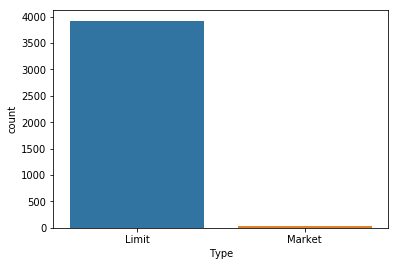

In [12]:
sns.countplot(x='Type',data=Good)


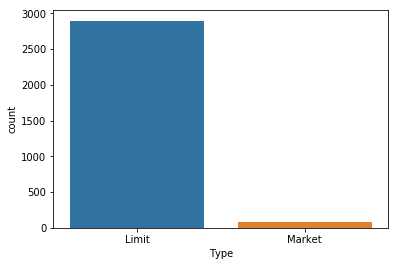

In [13]:
sns.countplot(x='Type',data=Poor)
#It seems that high number of orders raised as per limit price in both the files.

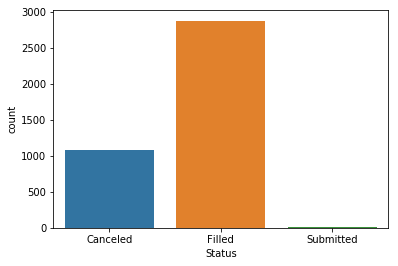

In [15]:
Good['Status']=Good['Status'].astype('category')
Poor['Status']=Poor['Status'].astype('category')
sns.countplot(x='Status',data=Good)


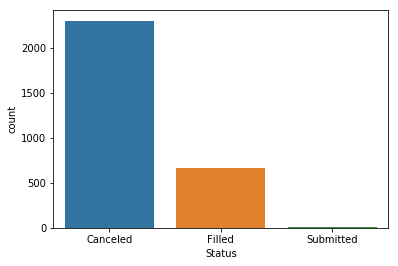

In [16]:
sns.countplot(x='Status',data=Poor)
#High number of canceled orders in poor back test compared to good back test and high number of filled orders in good back test in comparison to other one.  

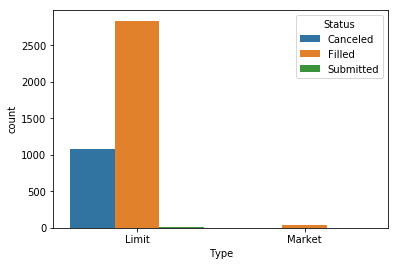

In [17]:
sns.countplot(x='Type',hue='Status',data=Good)

In [26]:
Good.describe()

,Price,Quantity,Value
count,3962.000000,3962.000000,3962.000000
mean,5.579933,929.780162,-32.631049
std,7.816178,3354.750183,5304.149695
min,0.000000,-12623.000000,-11707.500000
25%,0.000000,-646.750000,-5106.300000
50%,3.000000,495.500000,0.000000
75%,7.400000,3040.000000,5033.325000
max,62.650000,12623.000000,9991.200000


In [27]:
Good.dtypes

Time          object
Symbol        object
Price        float64
Quantity       int64
Type        category
Status      category
Value        float64
Tag           object
dtype: object

In [28]:
#Assigned Time variable as index
Good.Time=pd.to_datetime(Good.Time)
Good.set_index('Time',inplace=True)

In [29]:
Good.head()

,Symbol,Price,Quantity,Type,Status,Value,Tag
Time,,,,,,,
2017-01-04 14:40:00,FPP,0.7,7142,Limit,Filled,4999.4,
2017-01-04 14:40:00,AIII,0.0,5000,Limit,Canceled,0.0,
2017-01-04 14:40:00,SPEX,1.0,5000,Limit,Filled,5000.0,
2017-01-04 14:40:00,RIBT,0.0,5000,Limit,Canceled,0.0,
2017-01-04 14:40:00,VTNR,1.3,3846,Limit,Filled,4999.8,


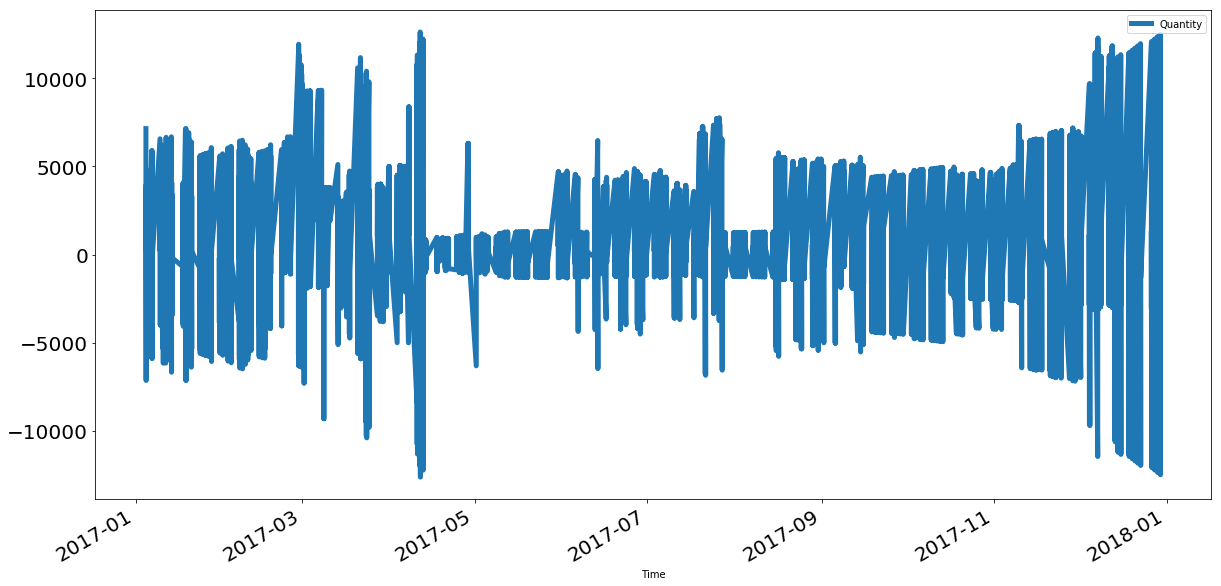

In [30]:
Good[['Quantity']].plot(figsize=(20,10),linewidth=5,fontsize=20)
#It seems that between june and october there is not much interest in buying units in good back test file.

In [31]:
Poor.Time=pd.to_datetime(Poor.Time)
Poor.set_index('Time',inplace=True)

In [32]:
Poor.head()

,Symbol,Price,Quantity,Type,Status,Value,Tag
Time,,,,,,,
2017-01-04 14:40:00,FPP,0.0,7142,Limit,Canceled,0.0,
2017-01-04 14:40:00,AIII,0.0,5000,Limit,Canceled,0.0,
2017-01-04 14:40:00,SPEX,0.0,5000,Limit,Canceled,0.0,
2017-01-04 14:40:00,RIBT,0.0,5000,Limit,Canceled,0.0,
2017-01-04 14:40:00,VTNR,0.0,3846,Limit,Canceled,0.0,


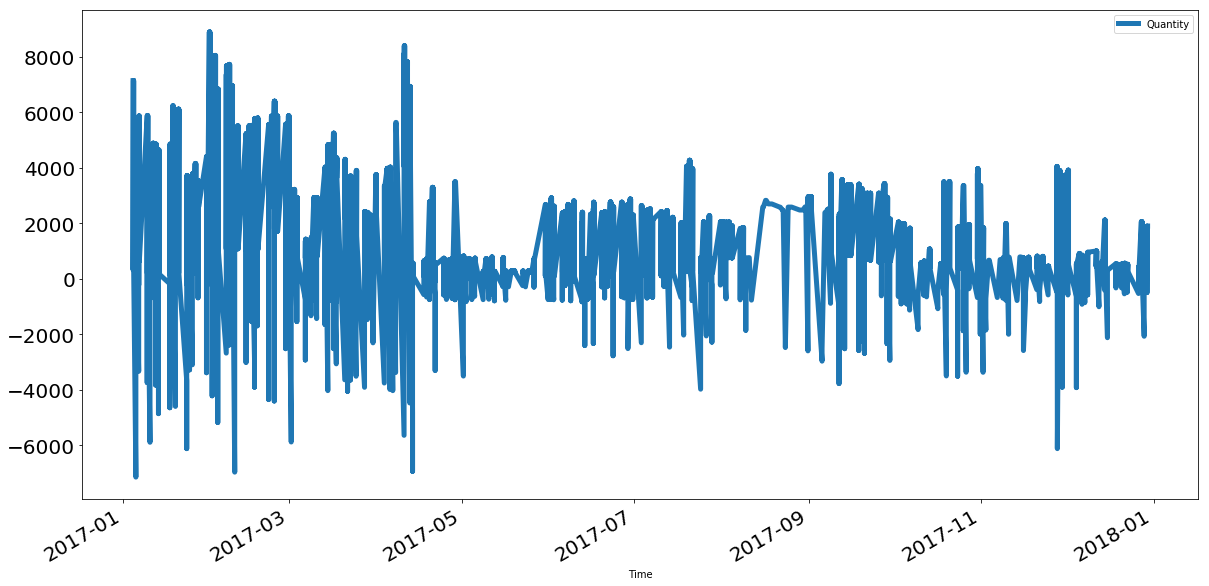

In [33]:
Poor[['Quantity']].plot(figsize=(20,10),linewidth=5,fontsize=20)
#It seems that after May,units were never bought more than 5000 in poor back test file.

In [34]:
#Filtered Filled line items
Good_Filled=Good[Good['Status']=='Filled']

In [35]:
Good_Filled.head()

,Symbol,Price,Quantity,Type,Status,Value,Tag
Time,,,,,,,
2017-01-04 14:40:00,FPP,0.70,7142,Limit,Filled,4999.4,
2017-01-04 14:40:00,SPEX,1.00,5000,Limit,Filled,5000.0,
2017-01-04 14:40:00,VTNR,1.30,3846,Limit,Filled,4999.8,
2017-01-04 14:40:00,XTNT,6.50,769,Limit,Filled,4998.5,
2017-01-04 14:40:00,IFMI,11.35,440,Limit,Filled,4994.0,


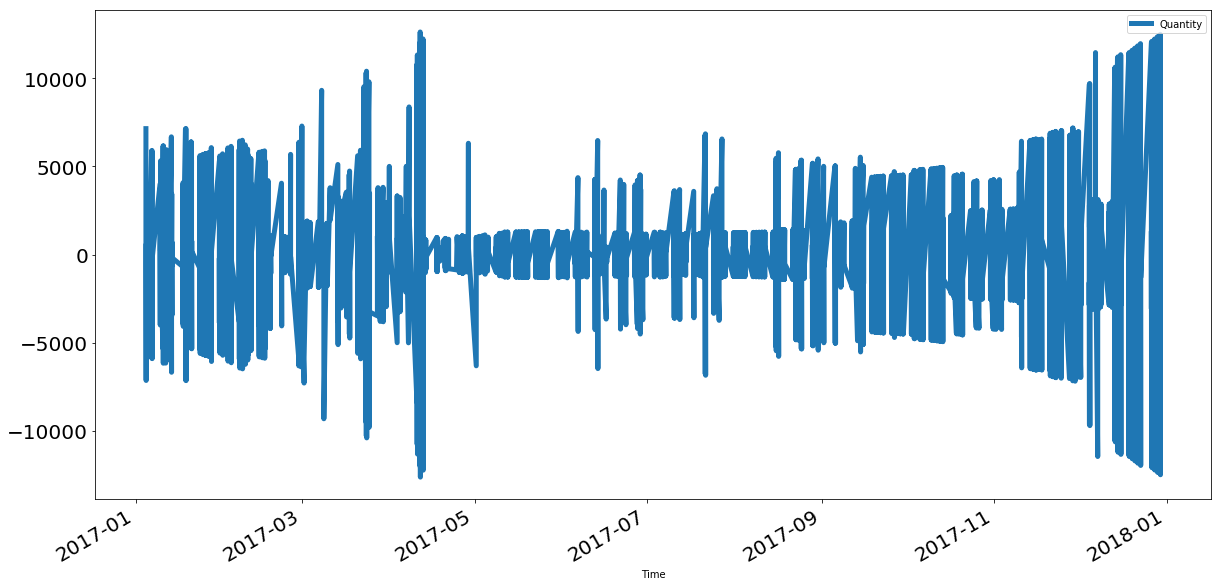

In [36]:
Good_Filled[['Quantity']].plot(figsize=(20,10),linewidth=5,fontsize=20)


In [38]:
Good_Submitted=Good[Good['Status']=='Submitted']
Good_Submitted.head()

,Symbol,Price,Quantity,Type,Status,Value,Tag
Time,,,,,,,
2017-01-20 16:25:00,FPP,0.0,-6387,Limit,Submitted,0.0,
2017-02-09 16:25:00,VTNR,0.0,-3474,Limit,Submitted,0.0,
2017-07-11 13:40:00,ZSAN,0.0,-184,Limit,Submitted,0.0,
2017-07-26 17:10:00,ESES,0.0,-3636,Limit,Submitted,0.0,
2017-07-27 15:25:00,XPL,0.0,-6556,Limit,Submitted,0.0,


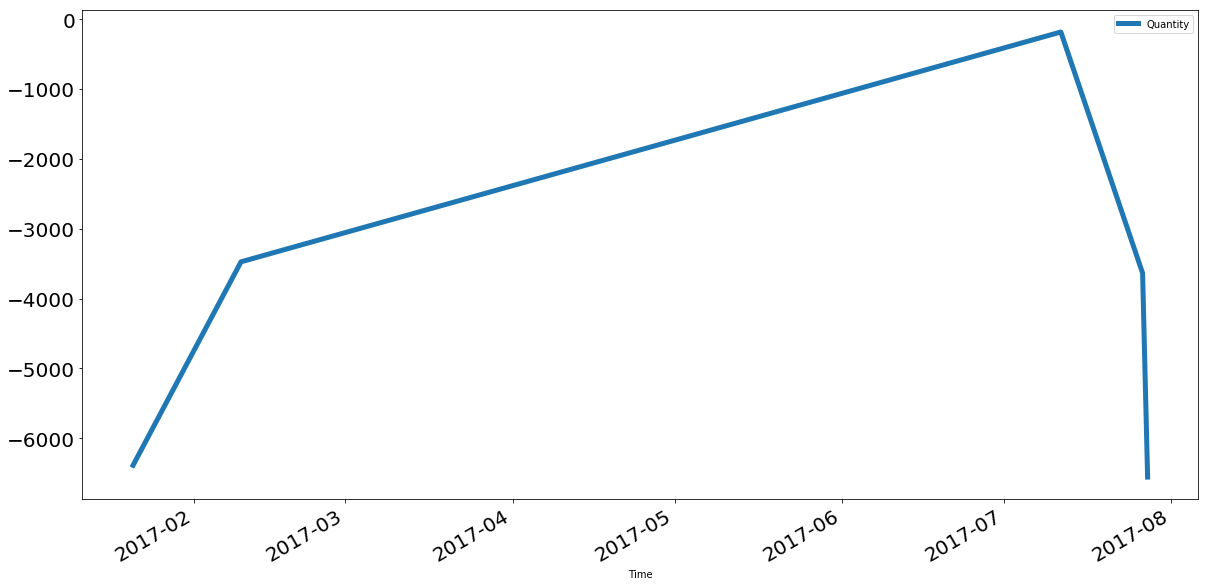

In [39]:
Good_Submitted[['Quantity']].plot(figsize=(20,10),linewidth=5,fontsize=20)
#It looks that submitted had seen a steady decrease since the start of the year but it becomes normal at the end of the year.

In [40]:
Good_Canceled=Good[Good['Status']=='Canceled']
Good_Canceled.head()

,Symbol,Price,Quantity,Type,Status,Value,Tag
Time,,,,,,,
2017-01-04 14:40:00,AIII,0.0,5000,Limit,Canceled,0.0,
2017-01-04 14:40:00,RIBT,0.0,5000,Limit,Canceled,0.0,
2017-01-04 14:40:00,TEAR,0.0,1030,Limit,Canceled,0.0,
2017-01-04 14:40:00,ZSAN,0.0,324,Limit,Canceled,0.0,
2017-01-04 16:25:00,AIII,0.0,3746,Limit,Canceled,0.0,


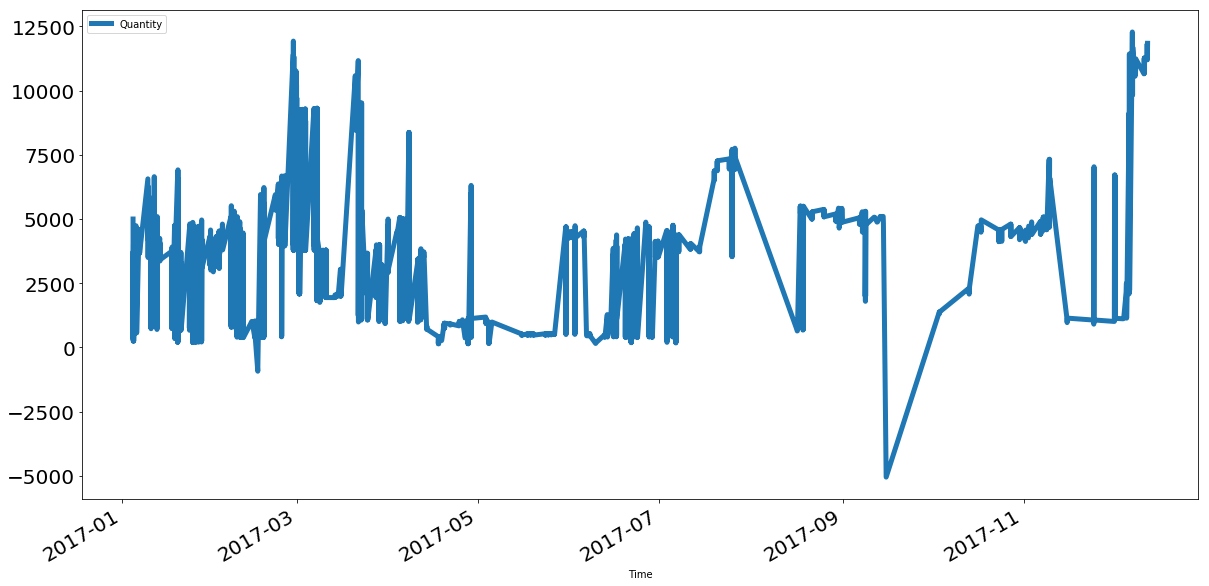

In [41]:
Good_Canceled[['Quantity']].plot(figsize=(20,10),linewidth=5,fontsize=20)
# Only once in a year an order was canceled on an attempt to sell,yet march and december saw a peak in cancelation. 

In [42]:
Good['Symbol'].value_counts()
#Tried to identify how many times a symbol appeared in a file.

CBIO    686
IFMI    486
IFON    447
ZSAN    287
STRM    278
HEAR    217
AIII    178
XTNT    138
STLY    128
TEAR    106
SPEX    105
ESES     94
BIOC     93
FAC      81
BLIN     77
VTNR     74
INUV     72
LIQT     48
RMGN     47
XPL      44
TAIT     41
YECO     34
FPP      32
CIDM     32
DPW      31
OGEN     30
SMTX     24
RKDA     13
DGSE     10
CLNT      8
MDVX      5
CNIT      5
GIGA      5
RIBT      4
FTEK      2
Name: Symbol, dtype: int64

In [140]:
u=Good.groupby('Symbol')['Quantity'].sum()
u.sort_values(ascending=False)
#Highest number of appearances in a file is not linearly related to total number of units.

Symbol
STRM    478356
AIII    462744
LIQT    364491
ESES    250135
SPEX    246081
STLY    241448
XPL     207373
INUV    197707
VTNR    164321
TAIT    158076
FAC     102862
YECO     96666
BIOC     91220
SMTX     88409
DPW      78657
CIDM     70415
CBIO     51283
FPP      50882
IFMI     41554
IFON     41514
BLIN     39241
TEAR     25097
RMGN     23793
CNIT     19491
RIBT     16546
DGSE     15326
XTNT     14796
GIGA     14507
OGEN     13825
HEAR     12756
ZSAN      7307
RKDA      1961
FTEK         0
CLNT         0
MDVX     -5051
Name: Quantity, dtype: int64

In [60]:
Top_Quantity_Filled=Good_Filled.groupby('Symbol')['Quantity'].sum()
Top_Quantity_Filled

Symbol
AIII       0
BIOC       0
BLIN       0
CBIO    1781
CIDM       0
CLNT       0
CNIT       0
DGSE       0
DPW        0
ESES    3636
FAC        0
FPP        0
FTEK       0
GIGA       0
HEAR    3201
IFMI       0
IFON       0
INUV       0
LIQT       0
MDVX       0
OGEN       0
RKDA       0
RMGN       0
SMTX       0
SPEX       0
STLY       0
STRM       0
TAIT       0
TEAR       0
VTNR    3474
XPL     6556
XTNT       0
YECO       0
ZSAN     184
Name: Quantity, dtype: int64

In [61]:
Top_Quantity_Filled.sort_values(ascending=False)
#Number of units were not sold in good back test file.

Symbol
XPL     6556
ESES    3636
VTNR    3474
HEAR    3201
CBIO    1781
ZSAN     184
BLIN       0
CIDM       0
CLNT       0
IFMI       0
DGSE       0
DPW        0
BIOC       0
FAC        0
FPP        0
FTEK       0
GIGA       0
CNIT       0
IFON       0
YECO       0
INUV       0
LIQT       0
MDVX       0
OGEN       0
RKDA       0
RMGN       0
SMTX       0
SPEX       0
STLY       0
STRM       0
TAIT       0
TEAR       0
XTNT       0
AIII       0
Name: Quantity, dtype: int64

In [62]:
Top_Quantity_Submitted=Good_Submitted.groupby('Symbol')['Quantity'].sum()
Top_Quantity_Submitted.sort_values(ascending=False)

Symbol
ZSAN    -184
VTNR   -3474
ESES   -3636
FPP    -6387
XPL    -6556
Name: Quantity, dtype: int64

In [63]:
Top_Quantity_Canceled=Good_Canceled.groupby('Symbol')['Quantity'].sum()
Top_Quantity_Canceled.sort_values(ascending=False)

Symbol
STRM    478356
AIII    462744
LIQT    364491
ESES    250135
SPEX    246081
STLY    241448
XPL     207373
INUV    197707
VTNR    164321
TAIT    158076
FAC     102862
YECO     96666
BIOC     91220
SMTX     88409
DPW      78657
CIDM     70415
FPP      57269
CBIO     49502
IFMI     41554
IFON     41514
BLIN     39241
TEAR     25097
RMGN     23793
CNIT     19491
RIBT     16546
DGSE     15326
XTNT     14796
GIGA     14507
OGEN     13825
HEAR      9555
ZSAN      7307
RKDA      1961
MDVX     -5051
Name: Quantity, dtype: int64

In [64]:
Top_value_Filled=Good_Filled.groupby('Symbol')['Value'].sum()
Top_value_Filled.sort_values(ascending=False)
#Revenue wise symbols ordered in a decreasing order. 

Symbol
VTNR     3669.000000
XPL      3405.700000
ESES     3398.000000
TEAR     2524.910000
MDVX     1491.700000
FPP       340.900000
OGEN      -24.602000
RKDA     -165.400000
TAIT     -189.500000
GIGA     -250.050000
CLNT     -262.650000
CNIT     -318.600000
FTEK     -323.400000
SMTX     -431.200000
DGSE     -487.850000
BLIN     -722.700000
ZSAN     -753.900000
CIDM     -783.600000
YECO    -1011.880700
LIQT    -1799.660000
BIOC    -1929.530000
XTNT    -3271.579345
SPEX    -4522.700000
HEAR    -4678.615600
AIII    -4698.200000
DPW     -4739.656000
RMGN    -7291.650000
FAC    -10030.150000
STLY   -11738.600000
IFON   -12278.825000
IFMI   -13288.619280
INUV   -15586.600000
CBIO   -20610.030000
STRM   -21924.680000
Name: Value, dtype: float64

In [65]:
Top_value_Submitted=Good_Submitted.groupby('Symbol')['Value'].sum()
Top_value_Submitted.sort_values(ascending=False)

Symbol
ZSAN    0.0
XPL     0.0
VTNR    0.0
FPP     0.0
ESES    0.0
Name: Value, dtype: float64

In [66]:
#Poor file
Poor_Filled=Good[Good['Status']=='Filled']
Poor_Submitted=Poor[Poor['Status']=='Submitted']
Poor_Canceled=Poor[Poor['Status']=='Canceled']

In [67]:
Poor_Quantity_Filled=Poor_Filled.groupby('Symbol')['Quantity'].sum()
Poor_Quantity_Filled.sort_values(ascending=False)
#Units were not sold looks same in both files.

Symbol
XPL     6556
ESES    3636
VTNR    3474
HEAR    3201
CBIO    1781
ZSAN     184
BLIN       0
CIDM       0
CLNT       0
IFMI       0
DGSE       0
DPW        0
BIOC       0
FAC        0
FPP        0
FTEK       0
GIGA       0
CNIT       0
IFON       0
YECO       0
INUV       0
LIQT       0
MDVX       0
OGEN       0
RKDA       0
RMGN       0
SMTX       0
SPEX       0
STLY       0
STRM       0
TAIT       0
TEAR       0
XTNT       0
AIII       0
Name: Quantity, dtype: int64

In [68]:
Poor_Quantity_Submitted=Poor_Submitted.groupby('Symbol')['Quantity'].sum()
Poor_Quantity_Submitted.sort_values(ascending=False)

Symbol
ZSAN    -110
IFMI    -273
IFON    -463
BLIN    -835
OGEN   -1004
HEAR   -1075
BIOC   -1555
INUV   -3918
XPL    -3975
FPP    -6116
Name: Quantity, dtype: int64

In [70]:
Poor_Quantity_Canceled=Poor_Canceled.groupby('Symbol')['Quantity'].sum()
Poor_Quantity_Canceled.sort_values(ascending=False)
#But cancelled and submitted number does not match.

Symbol
DPW     583374
AIII    476272
XPL     413619
STRM    288585
INUV    286882
ESES    236834
CLNT    235931
LIQT    209356
YECO    155337
STLY    150112
NFEC    141018
BIOC    139135
CBIO    129535
SPEX    121827
FPP     120233
SMTX    100147
FAC      96369
VTNR     96145
CNIT     78973
DGSE     70660
BLIN     67336
IFON     57248
CIDM     52600
IFMI     46725
TEAR     29213
TAIT     26299
FTEK     21018
ZSAN     18049
RMGN     17625
MDVX     15924
RIBT     15000
OGEN     14771
GIGA     11259
XTNT      7687
HEAR      3225
RKDA      1107
Name: Quantity, dtype: int64

In [71]:
G_AIII=Good[Good['Symbol']=='AIII']
G_AIII

,Symbol,Price,Quantity,Type,Status,Value,Tag
Time,,,,,,,
2017-01-04 14:40:00,AIII,0.00,5000,Limit,Canceled,0.00,
2017-01-04 16:25:00,AIII,0.00,3746,Limit,Canceled,0.00,
2017-01-04 18:10:00,AIII,0.00,4000,Limit,Canceled,0.00,
2017-01-04 19:55:00,AIII,0.00,3800,Limit,Canceled,0.00,
2017-01-05 14:40:00,AIII,1.20,3553,Limit,Filled,4263.60,
2017-01-05 16:25:00,AIII,1.25,-3553,Limit,Filled,-4441.25,
2017-01-09 14:40:00,AIII,1.15,3996,Limit,Filled,4595.40,
2017-01-09 16:25:00,AIII,1.20,-3996,Limit,Filled,-4795.20,
2017-01-09 18:10:00,AIII,1.15,3808,Limit,Filled,4379.20,


In [75]:
Poor_value_Filled=Poor_Filled.groupby('Symbol')['Value'].sum()
Poor_value_Filled.sort_values(ascending=False)
#Revenue generation looks same in both files.

Symbol
VTNR     3669.000000
XPL      3405.700000
ESES     3398.000000
TEAR     2524.910000
MDVX     1491.700000
FPP       340.900000
OGEN      -24.602000
RKDA     -165.400000
TAIT     -189.500000
GIGA     -250.050000
CLNT     -262.650000
CNIT     -318.600000
FTEK     -323.400000
SMTX     -431.200000
DGSE     -487.850000
BLIN     -722.700000
ZSAN     -753.900000
CIDM     -783.600000
YECO    -1011.880700
LIQT    -1799.660000
BIOC    -1929.530000
XTNT    -3271.579345
SPEX    -4522.700000
HEAR    -4678.615600
AIII    -4698.200000
DPW     -4739.656000
RMGN    -7291.650000
FAC    -10030.150000
STLY   -11738.600000
IFON   -12278.825000
IFMI   -13288.619280
INUV   -15586.600000
CBIO   -20610.030000
STRM   -21924.680000
Name: Value, dtype: float64

In [76]:
Poor_value_Submitted=Poor_Submitted.groupby('Symbol')['Value'].sum()
Poor_value_Submitted.sort_values(ascending=False)

Symbol
ZSAN    0.0
XPL     0.0
OGEN    0.0
INUV    0.0
IFON    0.0
IFMI    0.0
HEAR    0.0
FPP     0.0
BLIN    0.0
BIOC    0.0
Name: Value, dtype: float64

In [77]:
P_AIII=Poor[Poor['Symbol']=='AIII']
P_AIII
#Filtered single symbol.

,Symbol,Price,Quantity,Type,Status,Value,Tag
Time,,,,,,,
2017-01-04 14:40:00,AIII,0.00,5000,Limit,Canceled,0.00,
2017-01-04 18:10:00,AIII,0.00,5000,Limit,Canceled,0.00,
2017-01-04 19:55:00,AIII,0.00,5000,Limit,Canceled,0.00,
2017-01-05 14:40:00,AIII,0.00,3331,Limit,Canceled,0.00,
2017-01-05 16:25:00,AIII,0.00,3331,Limit,Canceled,0.00,
2017-01-05 18:10:00,AIII,0.00,3331,Limit,Canceled,0.00,
2017-01-05 19:55:00,AIII,1.20,3331,Limit,Filled,3997.20,
2017-01-06 14:40:00,AIII,1.16,-3331,Market,Filled,-3863.96,
2017-01-06 14:40:00,AIII,0.00,3561,Limit,Canceled,0.00,


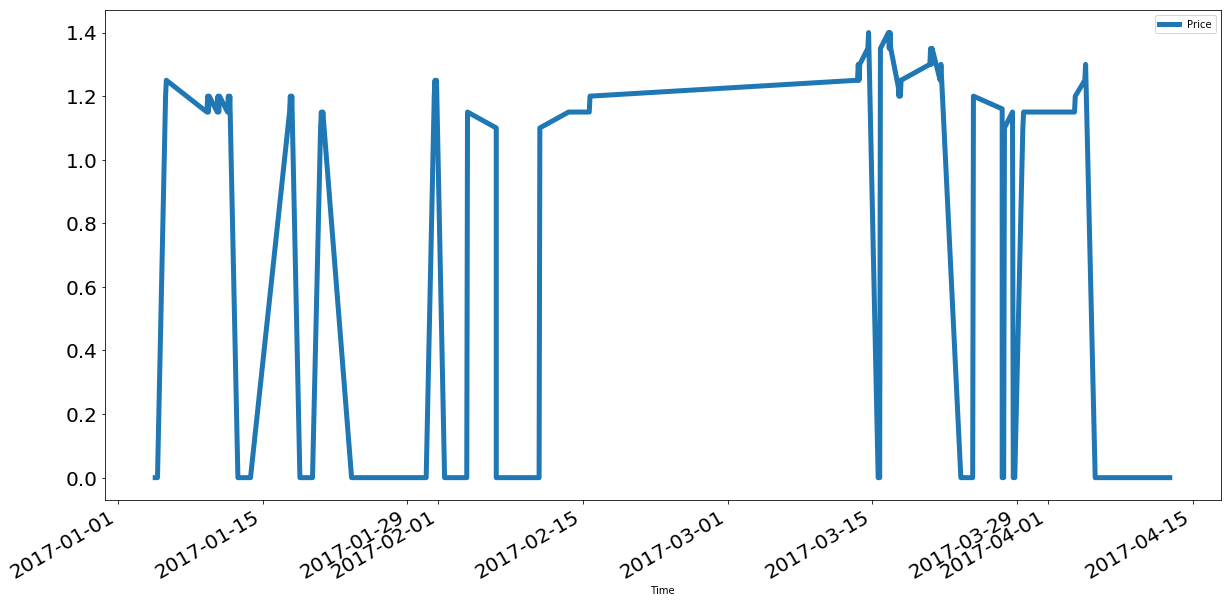

In [78]:
G_AIII[['Price']].plot(figsize=(20,10),linewidth=5,fontsize=20)

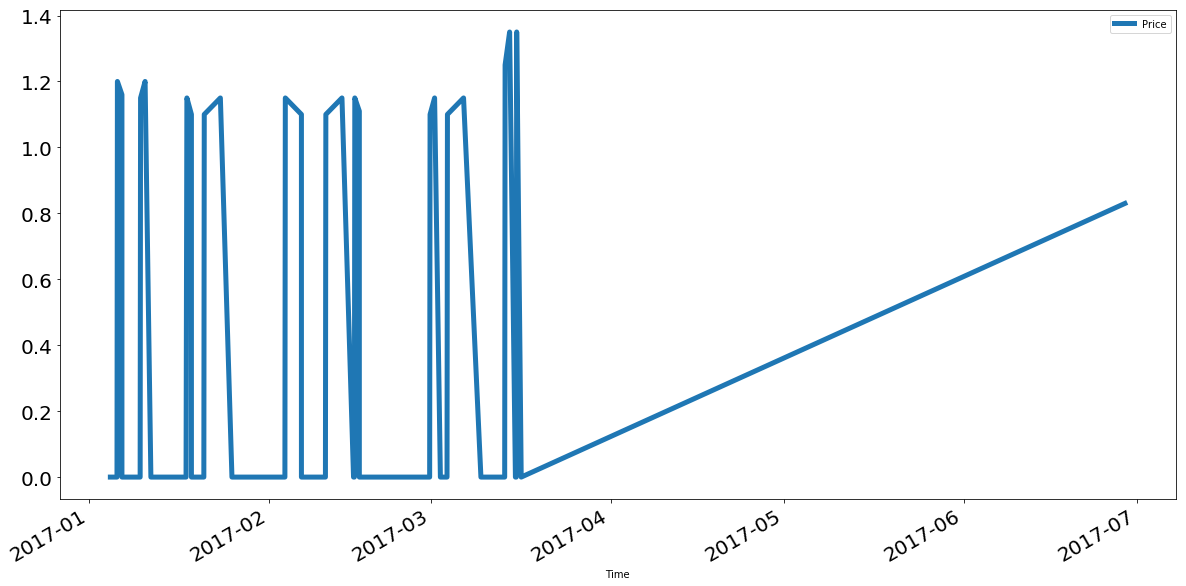

In [79]:
P_AIII[['Price']].plot(figsize=(20,10),linewidth=5,fontsize=20)
#From this plot it seems that symbols were not appeared on exactly same times in both files.

In [81]:
A=G_AIII[G_AIII['Quantity']>0]
B=G_AIII[G_AIII['Quantity']<0]

In [88]:
Good_Filled['Quantity'].describe()

count     2878.000000
mean         6.543433
std       3142.512173
min     -12623.000000
25%      -1254.750000
50%         83.500000
75%       1259.500000
max      12623.000000
Name: Quantity, dtype: float64

In [89]:
Good_Quantity_Bought=Good[Good['Quantity']>0]
Good_Quantity_Sold=Good[Good['Quantity']<0]

In [90]:
Good_Quantity_Bought['Quantity'].describe()

count     2519.000000
mean      2668.574037
std       2502.156050
min         77.000000
25%        631.000000
50%       1575.000000
75%       4225.000000
max      12623.000000
Name: Quantity, dtype: float64

In [91]:
GB_Filled=Good_Quantity_Bought[Good_Quantity_Bought['Status']=='Filled']
GB_Canceled=Good_Quantity_Bought[Good_Quantity_Bought['Status']=='Canceled']

In [92]:
GB_Filled['Quantity'].describe()

count     1442.000000
mean      2101.917476
std       2337.846401
min         77.000000
25%        476.250000
50%       1258.000000
75%       2881.500000
max      12623.000000
Name: Quantity, dtype: float64

In [93]:
GB_Canceled['Quantity'].describe()
#It seems that quantity does not play a significant role in filling and canceling order in good back test file.

count     1077.000000
mean      3427.272981
std       2514.984987
min        136.000000
25%       1015.000000
50%       3727.000000
75%       4668.000000
max      12284.000000
Name: Quantity, dtype: float64

In [94]:
Poor_Quantity_Bought=Poor[Poor['Quantity']>0]
Poor_Quantity_Sold=Poor[Poor['Quantity']<0]
PB_Filled=Poor_Quantity_Bought[Poor_Quantity_Bought['Status']=='Filled']
PB_Canceled=Poor_Quantity_Bought[Poor_Quantity_Bought['Status']=='Canceled']

In [95]:
PB_Filled['Quantity'].describe()

count     339.000000
mean     1422.675516
std      1483.833046
min        87.000000
25%       385.500000
50%       736.000000
75%      2317.500000
max      7142.000000
Name: Quantity, dtype: float64

In [97]:
PB_Canceled['Quantity'].describe()
#It seems that quantity does not play a significant role in filling and canceling order in poor back test file.

count    2295.000000
mean     1978.738998
std      1794.864545
min        84.000000
25%       565.000000
50%      1075.000000
75%      3178.000000
max      8895.000000
Name: Quantity, dtype: float64

In [105]:
Good.reset_index(inplace=True)
Poor.reset_index(inplace=True)

In [102]:
Good['Time'].value_counts()
#Not every particular time all symbols were appeared in file.

2017-02-08 14:40:00    9
2017-01-04 14:40:00    9
2017-02-03 14:40:00    9
2017-01-20 14:40:00    9
2017-02-07 14:40:00    9
2017-02-06 14:40:00    9
2017-01-27 14:40:00    9
2017-01-04 16:25:00    9
2017-01-23 14:40:00    9
2017-01-27 19:55:00    8
2017-02-03 16:25:00    8
2017-01-31 19:55:00    8
2017-01-23 16:25:00    8
2017-01-11 16:25:00    8
2017-01-27 16:25:00    8
2017-01-23 19:55:00    8
2017-02-07 16:25:00    8
2017-01-31 14:40:00    8
2017-02-07 18:10:00    8
2017-01-30 14:40:00    8
2017-01-26 16:25:00    8
2017-02-03 19:55:00    8
2017-01-27 18:10:00    8
2017-01-31 18:10:00    8
2017-01-26 18:10:00    8
2017-02-02 16:25:00    8
2017-01-18 14:40:00    8
2017-01-26 14:40:00    8
2017-02-03 18:10:00    8
2017-01-30 16:25:00    8
                      ..
2017-09-25 18:55:00    1
2017-09-18 18:55:00    1
2017-03-14 17:10:00    1
2017-09-28 15:25:00    1
2017-03-29 17:10:00    1
2017-09-29 13:40:00    1
2017-09-27 15:25:00    1
2017-09-26 17:10:00    1
2017-09-18 17:10:00    1


In [113]:
Go_Symbol=Good['Symbol']
Po_Symbol=Poor['Symbol']

In [115]:
R=Go_Symbol.drop_duplicates()

In [118]:
R.reset_index()

,index,Symbol
0,0,FPP
1,1,AIII
2,2,SPEX
3,3,RIBT
4,4,VTNR
5,5,TEAR
6,6,XTNT
7,7,IFMI
8,8,ZSAN
9,28,STLY


In [141]:
K=Po_Symbol.drop_duplicates()
K.reset_index()
#It looks one symbol(NFEC) is missing in good back test file.

,index,Symbol
0,0,FPP
1,1,AIII
2,2,SPEX
3,3,RIBT
4,4,VTNR
5,5,TEAR
6,6,XTNT
7,7,IFMI
8,8,ZSAN
9,28,STLY


In [129]:
#Top Symbols with highest number of Quantities bought in Good_backtest
GT = GB_Filled.groupby('Symbol')['Quantity'].sum()
GT.sort_values(ascending=False)

Symbol
STRM    448528
CBIO    434376
INUV    311732
HEAR    292283
STLY    234772
FAC     200603
IFON    125117
AIII    118633
SPEX     90454
IFMI     89137
YECO     84418
FPP      69826
ESES     59346
XTNT     56312
LIQT     49317
DPW      49316
BIOC     47917
XPL      43338
VTNR     43084
TEAR     29316
OGEN     27871
ZSAN     22202
BLIN     20356
CIDM     15672
RMGN     12033
MDVX     10574
DGSE      9757
SMTX      8624
FTEK      6468
CNIT      6372
GIGA      5001
TAIT      3790
CLNT      3593
RKDA       827
Name: Quantity, dtype: int64

In [130]:
#Top Symbols with highest number of Quantities bought in Poor_backtest
PT = PB_Filled.groupby('Symbol')['Quantity'].sum()
PT.sort_values(ascending=False)

Symbol
CLNT    42533
DPW     41325
XPL     37628
AIII    34668
STRM    28805
INUV    28262
CBIO    25443
BIOC    23397
SPEX    20993
NFEC    19385
FPP     19145
ESES    17755
YECO    15947
STLY    14164
FAC     10544
IFON    10350
DGSE    10148
BLIN    10037
VTNR     9556
CNIT     8663
IFMI     7450
LIQT     6963
CIDM     4857
RMGN     4196
ZSAN     3992
GIGA     3753
OGEN     3670
TEAR     3530
TAIT     3429
FTEK     3298
MDVX     2582
SMTX     2401
XTNT     1968
HEAR     1075
RKDA      375
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Quantities canceled range in good back test')

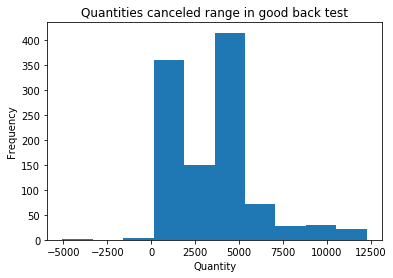

In [138]:
plt.hist(x='Quantity',data=Good_Canceled)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Quantities canceled range in good back test')
#In good back test,between 350 and 400 number of times 0 to 1750 and 3250 to 5000 units were cancelled.

Text(0.5, 1.0, 'Quantities canceled range in poor back test')

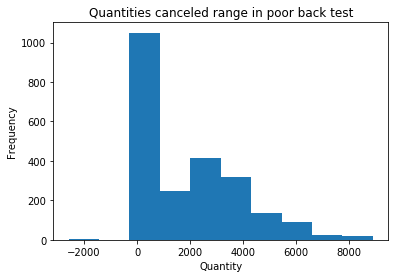

In [139]:
plt.hist(x='Quantity',data=Poor_Canceled)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Quantities canceled range in poor back test')
#In poor back test file between 0 to 1000 units were cancelled thousand times.

In [173]:
Goo=Good[Good['Quantity']>0]

In [174]:
W=Goo.groupby(['Symbol','Status'])['Status'].count()

In [175]:
Good.head()


,level_0,index,Time,Symbol,Price,Quantity,Type,Status,Value,Tag
0,0,0,2017-01-04 14:40:00,FPP,0.7,7142,Limit,Filled,4999.4,
1,1,1,2017-01-04 14:40:00,AIII,0.0,5000,Limit,Canceled,0.0,
2,2,2,2017-01-04 14:40:00,SPEX,1.0,5000,Limit,Filled,5000.0,
3,3,3,2017-01-04 14:40:00,RIBT,0.0,5000,Limit,Canceled,0.0,
4,4,4,2017-01-04 14:40:00,VTNR,1.3,3846,Limit,Filled,4999.8,


In [177]:
W

Symbol  Status  
AIII    Canceled    114
        Filled       32
BIOC    Canceled     45
        Filled       24
BLIN    Canceled     37
        Filled       20
CBIO    Canceled     45
        Filled      321
CIDM    Canceled     22
        Filled        5
CLNT    Filled        4
CNIT    Canceled      3
        Filled        1
DGSE    Canceled      4
        Filled        3
DPW     Canceled     11
        Filled       10
ESES    Canceled     62
        Filled       16
FAC     Canceled     19
        Filled       31
FPP     Canceled      9
        Filled       11
FTEK    Filled        1
GIGA    Canceled      3
        Filled        1
HEAR    Canceled      4
        Filled      107
IFMI    Canceled     98
        Filled      194
                   ... 
MDVX    Filled        2
OGEN    Canceled      6
        Filled       12
RIBT    Canceled      4
RKDA    Canceled      7
        Filled        3
RMGN    Canceled     23
        Filled       12
SMTX    Canceled     20
        Filled        2

In [181]:
W.dtypes

dtype('int64')

In [187]:
W=W.to_frame()

In [190]:
W

Status
Symbol Status          
AIII   Canceled     114
       Filled        32
BIOC   Canceled      45
       Filled        24
BLIN   Canceled      37
       Filled        20
CBIO   Canceled      45
       Filled       321
CIDM   Canceled      22
       Filled         5
CLNT   Filled         4
CNIT   Canceled       3
       Filled         1
DGSE   Canceled       4
       Filled         3
DPW    Canceled      11
       Filled        10
ESES   Canceled      62
       Filled        16
FAC    Canceled      19
       Filled        31
FPP    Canceled       9
       Filled        11
FTEK   Filled         1
GIGA   Canceled       3
       Filled         1
HEAR   Canceled       4
       Filled       107
IFMI   Canceled      98
       Filled       194
...                 ...
MDVX   Filled         2
OGEN   Canceled       6
       Filled        12
RIBT   Canceled       4
RKDA   Canceled       7
       Filled         3
RMGN   Canceled      23
       Filled        12
SMTX   Canceled      20
       Filled         2
SPEX   Canceled      59
       Filled        23
STLY   Canceled      46
       Filled        41
STRM   Canceled      98
       Filled        90
TAIT   Canceled      39
       Filled         1
TEAR   Canceled      31
       Filled        37
VTNR   Canceled      48
       Filled        13
XPL    Canceled      30
       Filled         7
XTNT   Canceled      18
       Filled        60
YECO   Canceled      18
       Filled         8
ZSAN   Canceled      37
       Filled       125

[66 rows x 1 columns]

In [192]:
W.columns=['Count']

In [194]:
W.reset_index()

,Symbol,Status,Count
0,AIII,Canceled,114
1,AIII,Filled,32
2,BIOC,Canceled,45
3,BIOC,Filled,24
4,BLIN,Canceled,37
5,BLIN,Filled,20
6,CBIO,Canceled,45
7,CBIO,Filled,321
8,CIDM,Canceled,22
9,CIDM,Filled,5


In [195]:
pd.pivot_table(W,values='Count',index=['Symbol'],columns=['Status'])
#Cacncelled and Filled orders in an attempt to buy in good back test file.

Status,Canceled,Filled
Symbol,,
AIII,114.0,32.0
BIOC,45.0,24.0
BLIN,37.0,20.0
CBIO,45.0,321.0
CIDM,22.0,5.0
CLNT,NaN,4.0
CNIT,3.0,1.0
DGSE,4.0,3.0
DPW,11.0,10.0


In [197]:
Goo.drop(['level_0','index'],axis=1)

,Time,Symbol,Price,Quantity,Type,Status,Value,Tag
0,2017-01-04 14:40:00,FPP,0.70,7142,Limit,Filled,4999.40,
1,2017-01-04 14:40:00,AIII,0.00,5000,Limit,Canceled,0.00,
2,2017-01-04 14:40:00,SPEX,1.00,5000,Limit,Filled,5000.00,
3,2017-01-04 14:40:00,RIBT,0.00,5000,Limit,Canceled,0.00,
4,2017-01-04 14:40:00,VTNR,1.30,3846,Limit,Filled,4999.80,
5,2017-01-04 14:40:00,TEAR,0.00,1030,Limit,Canceled,0.00,
6,2017-01-04 14:40:00,XTNT,6.50,769,Limit,Filled,4998.50,
7,2017-01-04 14:40:00,IFMI,11.35,440,Limit,Filled,4994.00,
8,2017-01-04 14:40:00,ZSAN,0.00,324,Limit,Canceled,0.00,
10,2017-01-04 16:25:00,AIII,0.00,3746,Limit,Canceled,0.00,


In [204]:
Goo.head()

,level_0,index,Symbol,Price,Quantity,Type,Status,Value,Tag
Time,,,,,,,,,
2017-01-04 14:40:00,0,0,FPP,0.7,7142,Limit,Filled,4999.4,
2017-01-04 14:40:00,1,1,AIII,0.0,5000,Limit,Canceled,0.0,
2017-01-04 14:40:00,2,2,SPEX,1.0,5000,Limit,Filled,5000.0,
2017-01-04 14:40:00,3,3,RIBT,0.0,5000,Limit,Canceled,0.0,
2017-01-04 14:40:00,4,4,VTNR,1.3,3846,Limit,Filled,4999.8,


In [205]:
Goo.drop(['level_0','index'],axis=1)

,Symbol,Price,Quantity,Type,Status,Value,Tag
Time,,,,,,,
2017-01-04 14:40:00,FPP,0.70,7142,Limit,Filled,4999.40,
2017-01-04 14:40:00,AIII,0.00,5000,Limit,Canceled,0.00,
2017-01-04 14:40:00,SPEX,1.00,5000,Limit,Filled,5000.00,
2017-01-04 14:40:00,RIBT,0.00,5000,Limit,Canceled,0.00,
2017-01-04 14:40:00,VTNR,1.30,3846,Limit,Filled,4999.80,
2017-01-04 14:40:00,TEAR,0.00,1030,Limit,Canceled,0.00,
2017-01-04 14:40:00,XTNT,6.50,769,Limit,Filled,4998.50,
2017-01-04 14:40:00,IFMI,11.35,440,Limit,Filled,4994.00,
2017-01-04 14:40:00,ZSAN,0.00,324,Limit,Canceled,0.00,


In [208]:
print(Goo.index)

DatetimeIndex(['2017-01-04 14:40:00', '2017-01-04 14:40:00',
               '2017-01-04 14:40:00', '2017-01-04 14:40:00',
               '2017-01-04 14:40:00', '2017-01-04 14:40:00',
               '2017-01-04 14:40:00', '2017-01-04 14:40:00',
               '2017-01-04 14:40:00', '2017-01-04 16:25:00',
               ...
               '2017-12-29 14:40:00', '2017-12-29 14:40:00',
               '2017-12-29 14:40:00', '2017-12-29 16:25:00',
               '2017-12-29 16:25:00', '2017-12-29 18:10:00',
               '2017-12-29 18:10:00', '2017-12-29 18:10:00',
               '2017-12-29 19:55:00', '2017-12-29 19:55:00'],
              dtype='datetime64[ns]', name='Time', length=2519, freq=None)


In [209]:
Goo.reset_index()

,Time,level_0,index,Symbol,Price,Quantity,Type,Status,Value,Tag
0,2017-01-04 14:40:00,0,0,FPP,0.70,7142,Limit,Filled,4999.40,
1,2017-01-04 14:40:00,1,1,AIII,0.00,5000,Limit,Canceled,0.00,
2,2017-01-04 14:40:00,2,2,SPEX,1.00,5000,Limit,Filled,5000.00,
3,2017-01-04 14:40:00,3,3,RIBT,0.00,5000,Limit,Canceled,0.00,
4,2017-01-04 14:40:00,4,4,VTNR,1.30,3846,Limit,Filled,4999.80,
5,2017-01-04 14:40:00,5,5,TEAR,0.00,1030,Limit,Canceled,0.00,
6,2017-01-04 14:40:00,6,6,XTNT,6.50,769,Limit,Filled,4998.50,
7,2017-01-04 14:40:00,7,7,IFMI,11.35,440,Limit,Filled,4994.00,
8,2017-01-04 14:40:00,8,8,ZSAN,0.00,324,Limit,Canceled,0.00,
9,2017-01-04 16:25:00,10,10,AIII,0.00,3746,Limit,Canceled,0.00,


In [214]:
Gf=Goo.resample('M').sum()

In [215]:
Gf

,level_0,index,Price,Quantity,Value
Time,,,,,
2017-01-31,96352,96352,1243.10,989356,782050.60
2017-02-28,243325,243325,1758.30,1019334,712066.65
2017-03-31,249984,249984,130.10,863229,284162.40
2017-04-30,295309,295309,627.86,437722,292329.07
2017-05-31,283662,283662,1208.10,145003,570999.60
2017-06-30,541131,541131,1644.80,412397,701201.40
2017-07-31,459154,459154,1292.80,391398,683667.35
2017-08-31,485419,485419,1201.40,309361,816557.55
2017-09-30,302597,302597,385.45,306653,482939.75


In [225]:
Good_Spent=Gf.drop(['level_0','index','Price'],axis=1)

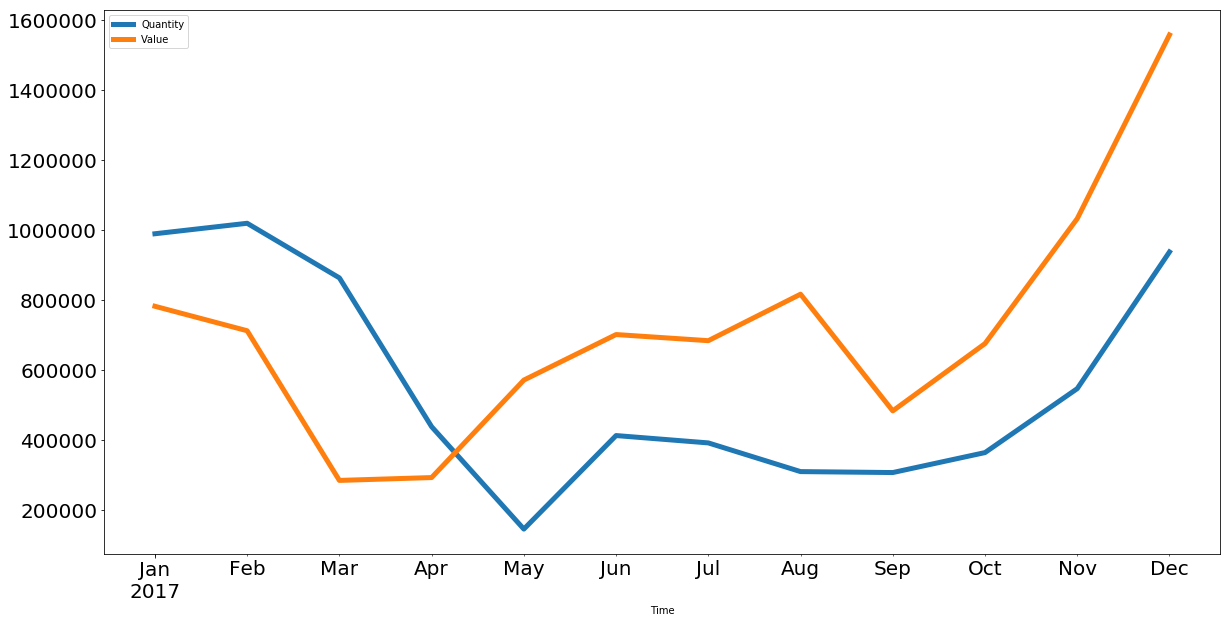

In [226]:
Good_Spent.plot(figsize=(20,10),linewidth=5,fontsize=20)